In [4]:
# HIDDEN
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

### Percentiles

In [5]:
x = make_array(43, 20, 51, 7, 28, 34)
y = np.sort(x)
y

array([ 7, 20, 28, 34, 43, 51], dtype=int64)

In [6]:
0.55 * 6

3.3000000000000003

In [7]:
percentile(55, x)

34

In [8]:
.95 * len(x)

5.699999999999999

In [9]:
percentile(95, x)

51

In [10]:
.99 * len(x)

5.9399999999999995

In [11]:
percentile(99, x)

51

In [12]:
s = [1, 7, 3, 9, 5]

In [13]:
percentile(10, s) == 0

False

In [14]:
percentile(39, s) == percentile(40, s)


True

In [15]:
percentile(40, s) == percentile(41, s)


False

In [16]:
percentile(50, s) == 5

True

### Bootstrap

Data set contains compensation data for employees of the City of San Diego.
We are going to study the final column, Total Compensation. That’s the employee’s salary plus the City’s contribution towards his/her retirement and benefit plans.

In [17]:
sf = Table.read_table('san_francisco_2015.csv')
sf

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,21,"Prof & Tech Engineers - Miscellaneous, Local 21",2400,"Lab, Pharmacy & Med Techs",2481,Water Qualitytech I/II,21538,82146,0,0,82146,16942.2,12340.9,6337.73,35620.8,117767
Calendar,2015,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,12,"Carpet, Linoleum and Soft Tile Workers, Local 12",7300,Journeyman Trade,7393,Soft Floor Coverer,5459,32165.8,973.19,848.96,33987.9,0,4587.51,2634.42,7221.93,41209.8
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",1636,Health Care Billing Clerk 2,41541,71311,5757.98,0,77069,14697.6,12424.5,6370.06,33492.2,110561
Calendar,2015,4,Community Health,DPH,Public Health,351,Municipal Executive Association - Miscellaneous,0900,Management,2620,Food Service Mgr Administrator,26718,28430.2,0,763.07,29193.3,0,4223.14,5208.51,9431.65,38625
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,8201,School Crossing Guard,45810,7948.75,0,0,7948.75,0,2873.17,616.24,3489.41,11438.2
Calendar,2015,1,Public Protection,POL,Police,911,Police Officers' Association,Q000,Police Services,Q002,Police Officer,32906,2235,0,0,2235,490.36,286.72,176.57,953.65,3188.65
Calendar,2015,4,Community Health,DPH,Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,2328,Nurse Practitioner,7506,187247,0,11704.1,198951,37683.7,12424.5,11221.7,61329.9,260281
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,253,"Transport Workers - Transit Operators, Local 250-A",9100,Street Transit,9163,Transit Operator,36773,66988.5,3512.88,2770.39,73271.8,19127.2,13203,5455.1,37785.3,111057
Calendar,2015,6,General Administration & Finance,CAT,City Attorney,311,Municipal Attorneys' Association,8100,Legal & Court,8177,Attorney (Civil/Criminal),12963,135190,0,1562.5,136752,27501.8,12424.5,10103,50029.3,186781
Calendar,2015,3,Human Welfare & Neighborhood Development,DSS,Human Services,535,"SEIU - Human Services, Local 1021",9700,Community Development,9703,Emp & Training Spec 2,35179,70474.8,147.28,1647.24,72269.3,14650.3,10696.9,5993.11,31340.3,103610


In [18]:
sf.where('Job', 'Mayor')

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,6,General Administration & Finance,MYR,Mayor,556,Elected Officials,1100,Administrative & Mgmt (Unrep),1190,Mayor,22433,288964,0,0,288964,58117,12424.5,20293,90834.5,379798


In [19]:
sf.sort('Total Compensation', descending=True).show(5)

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,6,General Administration & Finance,RET,Retirement System,351,Municipal Executive Association - Miscellaneous,1100,Administrative & Mgmt (Unrep),1119,Chief Investment Officer,46881,507832,0,0,507832,105053,12424.5,23566.2,141044,648875
Calendar,2015,6,General Administration & Finance,ADM,General Services Agency - City Admin,164,Physicians and Dentists - Miscellaneous,2500,Med Therapy & Auxiliary,2598,Asst Med Examiner,1016,279311,3829.36,114434,397574,56211.6,12424.5,14299.1,82935.2,480509
Calendar,2015,6,General Administration & Finance,ADM,General Services Agency - City Admin,164,Physicians and Dentists - Miscellaneous,2500,Med Therapy & Auxiliary,2598,Asst Med Examiner,13746,279311,9046.92,56742.6,345101,56211.6,12424.5,13482.7,82118.8,427219
Calendar,2015,2,"Public Works, Transportation & Commerce",AIR,Airport Commission,351,Municipal Executive Association - Miscellaneous,0900,Management,0965,Dept Head V,17356,326764,0,0,326764,65806.3,12424.5,21691.2,99922.1,426686
Calendar,2015,4,Community Health,DPH,Public Health,351,Municipal Executive Association - Miscellaneous,0900,Management,1164,"Adm, SFGH Medical Center",1523,256098,0,82292.3,338390,51977.5,11468.8,20963.3,84409.6,422800


In [20]:
sf.sort('Total Compensation', descending=False).show(5)

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,1,Public Protection,FIR,Fire Department,798,"Firefighters - Miscellaneous, Local 798",H000,Fire Services,H002,Firefighter,43833,0,0,0,0,0,0,-423.76,-423.76,-423.76
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",9900,Public Service Aide,9924,PS Aide Health Services,27871,-292.4,0,0,-292.4,0,-95.58,-22.63,-118.21,-410.61
Calendar,2015,1,Public Protection,JUV,Juvenile Probation,790,"SEIU - Miscellaneous, Local 1021",8300,Correction & Detention,8320,"Counselor, Juvenile Hall",10517,0,0,0,0,0,0,-159.12,-159.12,-159.12
Calendar,2015,6,General Administration & Finance,CPC,City Planning,21,"Prof & Tech Engineers - Miscellaneous, Local 21",1000,Information Systems,1053,IS Business Analyst-Senior,18961,0,0,0,0,0,0,-26.53,-26.53,-26.53
Calendar,2015,6,General Administration & Finance,CPC,City Planning,21,"Prof & Tech Engineers - Miscellaneous, Local 21",5200,Professional Engineering,5277,Planner 1,19387,0,0,0,0,0,0,-9.51,-9.51,-9.51


For clarity of comparison, we will focus our attention on those who had at least the equivalent of a half-time job for the whole year. At a minimum wage of about 10 dollars per hour, and 20 hours per week for 52 weeks, that’s a salary of about $10,000.

In [21]:
10 * 20 * 52

10400

In [22]:
sf = sf.where('Total Compensation', are.above(10000))

In [23]:
sf.num_rows

38217

Let this table (sf) of 38,217 rows be our population.Let's calculate median total compensation of the population

In [24]:
#50th percentile: Median total compensation of the population
pop_median = percentile(50, sf.column('Total Compensation'))
pop_median

107219.48

From a practical perspective, there is no reason for us to draw a sample to estimate this parameter (median total compensation) since we simply know its value as calculated above. 

But we are going to pretend we don’t know the value, and see how well we can estimate it based on a random sample.

Later we will come down to earth and work in situations where the parameter is unknown. For now, we are all-knowing.



Let us draw a sample of employees at random without replacement, and let the median total compensation of the sampled employees serve as our estimate of the parameter.


In [25]:
# Let's get a sample of 300
our_sample = sf.sample(300, with_replacement=False)
our_sample

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,261,"Laborers, Local 261",3400,Agriculture & Horticulture,3424,Integrated Pest Mgmt Specialst,44119,80357,268.8,0,80625.8,16562.1,12424.5,7106.6,36093.2,116719
Calendar,2015,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,22,"Prof & Tech Engineers - Personnel, Local 21",1400,"Clerical, Secretarial & Steno",1452,Executive Secretary 2,4725,81230.3,0,0,81230.3,16736.2,12376.7,6455.79,35568.8,116799
Calendar,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",2700,Housekeeping & Laundry,2736,Porter,34760,47142.1,0,2445,49587.1,11301.3,12424.5,3978.45,27704.3,77291.4
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,253,"Transport Workers - Transit Operators, Local 250-A",9100,Street Transit,9163,Transit Operator,50500,66458.1,19280.6,1646.2,87384.9,18634.5,13094.6,6571.47,38300.6,125686
Calendar,2015,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,4,"Painters, Local 1176",7300,Journeyman Trade,7346,Painter,46355,78807.9,3980.15,553,83341.1,16346.7,12281.2,6659.6,35287.5,118629
Calendar,2015,2,"Public Works, Transportation & Commerce",PUC,PUC Public Utilities Commission,38,"Plumbers and Pipefitters, Local 38",7300,Journeyman Trade,7316,Water Service Inspector,21046,16520,0,0,16520,3074.35,2389.32,1307.34,6771.01,23291
Calendar,2015,3,Human Welfare & Neighborhood Development,DSS,Human Services,535,"SEIU - Human Services, Local 1021",2900,Human Services,2915,Program Specialist Supervisor,24947,7194.01,0,0,7194.01,1613.62,955.73,595.42,3164.77,10358.8
Calendar,2015,6,General Administration & Finance,ADM,General Services Agency - City Admin,790,"SEIU - Miscellaneous, Local 1021",9900,Public Service Aide,9910,Public Service Trainee,51962,10505.2,0,0,10505.2,1520.13,4760.74,835.83,7116.7,17622
Calendar,2015,2,"Public Works, Transportation & Commerce",AIR,Airport Commission,251,"Transport Workers - Miscellaneous, Local 250-A",3500,Museum & Cultural Affairs,3542,Curator 2,50364,12360,0,0,12360,2424.61,2389.33,1006.87,5820.81,18180.8
Calendar,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",2300,Nursing,2303,Patient Care Assistant,32862,69510.6,0,6491.66,76002.3,15415.3,12293.8,6010.29,33719.4,109722


In [26]:
# Median total compensation of the sample
est_median = percentile(50, our_sample.column('Total Compensation'))
est_median

103868.23

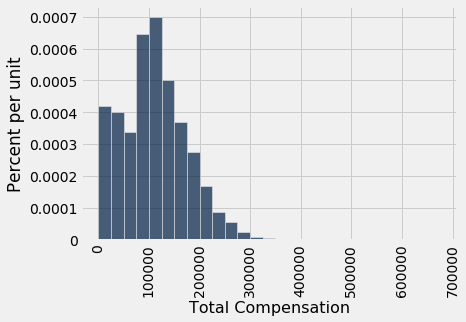

In [27]:
# Here is a histogram of the total compensations of poputation
sf_bins = np.arange(0, 700000, 25000)
sf.hist('Total Compensation', bins=sf_bins)

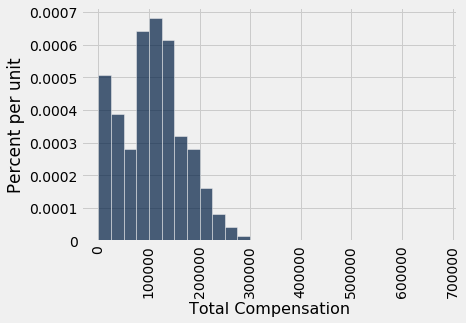

In [28]:
# histogram of the total compensations of sample
our_sample.hist('Total Compensation', bins=sf_bins)

The sample size is large. By the law of averages, the distribution of the sample resembles that of the population, and consequently the sample median is not very far from the population median (though of course it is not exactly the same).

So now we have one estimate of the parameter. But had the sample come out differently, the estimate would have had a different value. We would like to be able to quantify the amount by which the estimate could vary across samples. That measure of variability will help us measure how accurately we can estimate the parameter.

To see how different the estimate would be if the sample had come out differently, we could just draw another sample from the population, but that would be cheating. We are trying to mimic real life, in which we won’t have all the population data at hand.

Somehow, we have to get another random sample without sampling from the population.

The Bootstrap: Resampling from the Sample

What we do have is a large random sample from the population. As we know, a large random sample is likely to resemble the population from which it is drawn. Then the sampling procedure can be replicated by sampling from the sample.

Here are the steps of the bootstrap method for generating another random sample that resembles the population:

- Treat the original sample as if it were the population.
- Draw from the sample, at random with replacement, the same number of times as the original sample size.


In [29]:
# A Bootstrap sample
resample1 = our_sample.sample(300, with_replacement=True)

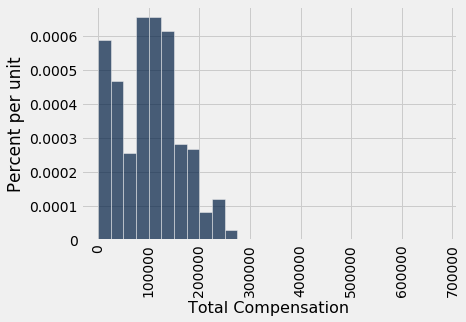

In [30]:
resample1.hist('Total Compensation', bins=sf_bins)

In [31]:
# Another Bootstrap sample. If no parameter is specified for sample(), it returns a sample size that is equal to the original with replacement
resample2 = our_sample.sample()

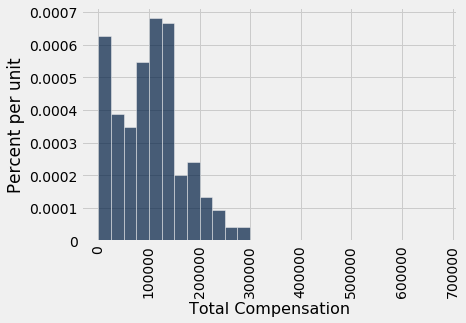

In [32]:
resample2.hist('Total Compensation', bins=sf_bins)

In [33]:
percentile(50, resample1.column('Total Compensation'))

100201.34

In [34]:
percentile(50, resample2.column('Total Compensation'))

101164.25

Bootstrap Empirical Distribution of the Sample Median:

Let us define a function bootstrap_median that takes our original sample, the label of the column containing the variable, and the number of bootstrap samples we want to take, and returns an array of the corresponding resampled medians.

Each time we resample and find the median, we replicate the bootstrap process. So the number of bootstrap samples will be called the number of replications.



In [35]:
# We can create a large number of bootstrap samples and calculate median of each. 
medians = make_array()

for i in np.arange(1000):
    resampled = our_sample.sample()
    median = percentile(50, resampled.column('Total Compensation'))
    medians = np.append(medians, median)

Let's put this into a function:

In [36]:
def bootstrap_median(original_sample, label, replications):
    """Simulate sample median:
    original_sample: table containing the original sample
    label: label of column containing the variable
    replications: number of bootstrap samples
    Returns array of bootstrap sample medians
    """
    medians = make_array()
    for i in np.arange(replications):
        bootstrap_sample = original_sample.sample()
        resampled_median = percentile(50, bootstrap_sample.column(label))
        medians = np.append(medians, resampled_median)
        
    return medians

In [37]:
bstrap_medians = bootstrap_median(our_sample, 'Total Compensation', 2000)
bstrap_medians

array([105541.52, 101164.25, 100210.83, ..., 101457.91, 112587.81,
       105541.52])

Here is the histogram of the 2000 medians. The red dot is the population parameter: it is the median of the entire population, which we happen to know but did not use in the bootstrap process.

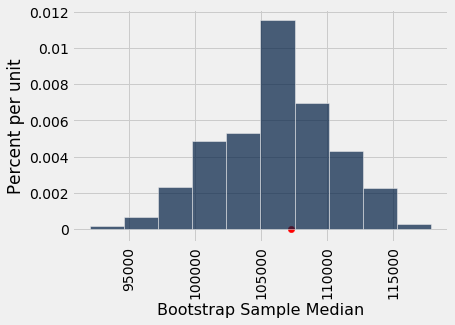

In [68]:
resampled_medians = Table().with_column(
    'Bootstrap Sample Median', bstrap_medians)

resampled_medians.hist()

#plots.scatter(pop_median, 0, color='red', s=40);

It is important to remember that the red dot is fixed, the population median. The empirical histogram is the result of random draws, and will be situated randomly relative to the red dot.

Remember also that the point of all these computations is to estimate the population median, which is the red dot. Our estimates are all the randomly generated sampled medians whose histogram you see above. We want those estimates to contain the parameter – it they don’t, then they are off.

Do the Estimates Capture the Parameter?

How often does the empirical histogram of the resampled medians sit firmly over the red dot, and not just brush the dot with its tails? To answer this, we must define “sit firmly”. Let’s take that to mean “the middle 95% of the resampled medians contains the red dot”.

Here are the two ends of the “middle 95%” interval of resampled medians:

In [75]:
left = percentile(2.5, bstrap_medians)
left

97384.66

In [76]:
right = percentile(97.5, bstrap_medians)
right

114225.03

The population median is between these two numbers. The interval and the population median are shown on the histogram below

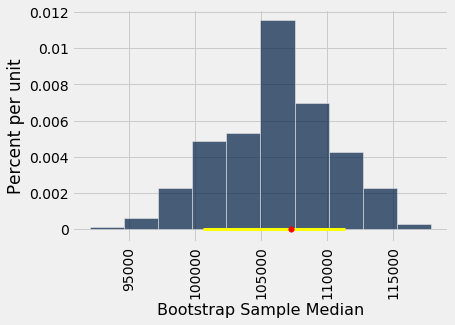

In [74]:
resampled_medians.hist()

plots.plot([left, right], [0, 0], color='yellow', lw=3, zorder=1)
plots.scatter(pop_median, 0, color='red', s=30, zorder=2);

In [41]:
confidence_interval = make_array(left, right)
confidence_interval

array([100712.34, 120176.82])

The “middle 95%” interval of estimates captured the parameter in our example. But was that a fluke?

To see how frequently the interval contains the parameter, we have to run the entire process over and over again. Specifically, we will repeat the following process 100 times:

- Draw an original sample from the population.
- Carry out n replications of the bootstrap process and generate the “middle 95%” interval of resampled medians.

We will end up with 100 intervals, and count how many of them contain the population median.

The statistical theory of the bootstrap says that the number should be around 95. It may be in the low 90s or high 90s, but not much farther off 95 than that.

In [42]:
# THE BIG SIMULATION: This one takes a long time.

# Generate the endpoints of 100 intervals

left_ends = make_array()
right_ends = make_array()

for i in np.arange(100):
    first_sample = sf.sample(300, with_replacement=False)
    medians = bootstrap_median(first_sample, 'Total Compensation', 2000)
    left_ends = np.append(left_ends, percentile(2.5, medians))
    right_ends = np.append(right_ends, percentile(97.5, medians))

In [43]:
intervals = Table().with_column(
    'Left', left_ends,
    'Right', right_ends
)    

In [44]:
intervals

Left,Right
97320.9,114027
97832.2,113400
98250.1,113077
93651.3,114232
97947.2,114036
99822.5,120317
103288,120885
104888,123037
96245.5,115891
93765.4,108143


In [45]:
good = intervals.where('Left', are.below(pop_median)).where('Right', are.above(pop_median)).num_rows

In [46]:
good / 100

0.95